## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sorted_df = combined_data.groupby(["Mouse ID","Timepoint"])
find_duplicates = sorted_df.head()
duplicates = find_duplicates[find_duplicates.duplicated(["Mouse ID","Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicates = find_duplicates.drop_duplicates(subset=["Mouse ID","Timepoint"])
drop_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_df = drop_duplicates
regimen = clean_df.groupby(["Drug Regimen"])

mean = regimen["Tumor Volume (mm3)"].mean()
median = regimen["Tumor Volume (mm3)"].median()
var = regimen["Tumor Volume (mm3)"].var()
std_dev = regimen["Tumor Volume (mm3)"].std()
sem = regimen["Tumor Volume (mm3)"].sem()

drug_regimen_stats = pd.DataFrame({"Mean": mean,
                          "Median": median,
                          "Variance": var,
                          "Standard Deviation": std_dev,
                          "SEM": sem})
drug_regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_df = drop_duplicates
clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count')

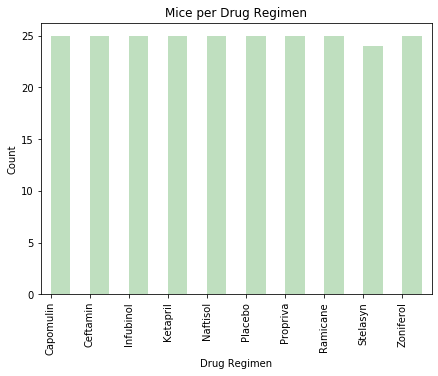

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = regimen["Mouse ID"].nunique()
my_plot = mouse_count.plot.bar(title="Mice per Drug Regimen", color="g", alpha=0.25,align="edge", figsize=(7,5))
my_plot.set_ylabel("Count")


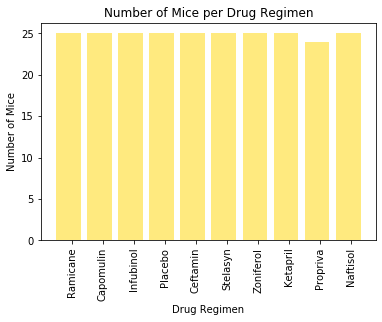

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drugs = np.arange(len(mouse_count))
ticks = regimen["Drug Regimen"].head().unique()
# ticks = mouse_count
ticks
plt.bar(drugs-0.5, mouse_count, color="gold", alpha=0.5, align="edge")
plt.xticks(drugs,ticks, rotation="vertical")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.title("Number of Mice per Drug Regimen")
plt.show()


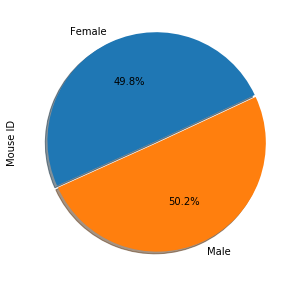

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = clean_df.groupby(["Sex"]).nunique()
gender_count = gender["Mouse ID"].head()
gender_count
explode = (0.02,0)

gender_count.plot(kind="pie", figsize=(8,5), explode=explode, shadow=True, startangle=25, autopct='%1.1f%%')
plt.show()
# gender_count_2 = clean_df.groupby(["Sex"]).agg({"Mouse ID": ["nunique"]})
# gender_count_2.plot.pie(subplots=True)

# male_females = gender_count_2["Mouse ID"].count


([<matplotlib.patches.Wedge at 0x2186dc1a3c8>,
 [Text(0.006939175976765795, 1.0999781124353174, ''),
  Text(-0.006939175976765929, -1.0999781124353174, '')])

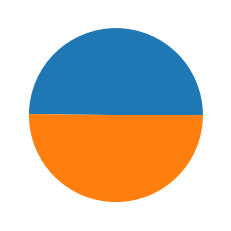

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_df.groupby(["Sex"]).nunique()
# counts = gender["Mouse ID"].head()
counts = gender["Mouse ID"]
counts

plt.pie(counts)
# plt.axis("equal")
# plt.show()

# gender_count2 = clean_df.groupby(["Sex"]).agg({"Mouse ID": ["nunique"]})
# plt.pie(gender_count2)


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# final_vol = clean_df.groupby(["Drug Regimen","Mouse ID"]).agg({"Timepoint":["max"],"Tumor Volume (mm3)":["sum"]})
# new_df = final_vol.loc[["Capomulin","Ramicane","Infubinol", "Ceftamin"]]
# new_df

max_timepoint = clean_df.groupby(["Mouse ID"]).max()
regimen_max_timepoint = max_timepoint.loc[(max_timepoint["Drug Regimen"] == "Capomulin")|(max_timepoint["Drug Regimen"] == "Ramicane")|
                                         (max_timepoint["Drug Regimen"] == "Infubinol")|(max_timepoint["Drug Regimen"] == "Ceftamin")]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = regimen_max_timepoint.groupby(["Drug Regimen","Mouse ID"]).head()
new_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
# add subset 
    
    
# Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
